In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./US_Crime_Rate_2016.csv")
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson2
0,New York,8379043.0,47821.0,319.0,2770.0,13396.0,31336.0,122299.0,9846.0,106931.0,5522.0,NaN
1,Los Angeles,8379043.0,29400.0,258.0,2274.0,9652.0,17216.0,95704.0,13809.0,66253.0,15642.0,1672.0
2,Chicago,8379043.0,25532.0,492.0,1761.0,7983.0,15296.0,80742.0,9578.0,62083.0,9081.0,416.0
3,Houston,8379043.0,25257.0,275.0,1249.0,9147.0,14586.0,101750.0,17038.0,71614.0,13098.0,485.0
4,Detroit,8379043.0,13040.0,275.0,952.0,2346.0,9467.0,28550.0,6820.0,14844.0,6886.0,789.0


In [3]:
df.columns.tolist()

['City',
 'Population',
 'Violent crime',
 'Murder and nonnegligent manslaughter',
 'Rape1',
 'Robbery',
 'Aggravated assault',
 'Property crime',
 'Burglary',
 'Larceny-theft',
 'Motor vehicle theft',
 'Arson2']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8105 entries, 0 to 8104
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   City                                  8105 non-null   object 
 1   Population                            8103 non-null   float64
 2   Violent crime                         8084 non-null   float64
 3   Murder and nonnegligent manslaughter  8102 non-null   float64
 4   Rape1                                 8090 non-null   float64
 5   Robbery                               8104 non-null   float64
 6   Aggravated assault                    8103 non-null   float64
 7   Property crime                        8082 non-null   float64
 8   Burglary                              8092 non-null   float64
 9   Larceny-theft                         8098 non-null   float64
 10  Motor vehicle theft                   8102 non-null   float64
 11  Arson2           

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum().sum()

216

In [7]:
df.isnull().sum(axis = 0)

City                                      0
Population                                2
Violent crime                            21
Murder and nonnegligent manslaughter      3
Rape1                                    15
Robbery                                   1
Aggravated assault                        2
Property crime                           23
Burglary                                 13
Larceny-theft                             7
Motor vehicle theft                       3
Arson2                                  126
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7937 entries, 1 to 8083
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   City                                  7937 non-null   object 
 1   Population                            7937 non-null   float64
 2   Violent crime                         7937 non-null   float64
 3   Murder and nonnegligent manslaughter  7937 non-null   float64
 4   Rape1                                 7937 non-null   float64
 5   Robbery                               7937 non-null   float64
 6   Aggravated assault                    7937 non-null   float64
 7   Property crime                        7937 non-null   float64
 8   Burglary                              7937 non-null   float64
 9   Larceny-theft                         7937 non-null   float64
 10  Motor vehicle theft                   7937 non-null   float64
 11  Arson2           

In [10]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson2
count,7.937000e+03,7937.000000,7937.000000,7937.000000,7937.000000,7937.000000,7937.000000,7937.000000,7937.000000,7937.000000,7937.000000
mean,7.182187e+06,96.092226,1.237369,10.417286,23.057830,61.379740,554.639158,83.772584,410.972660,59.893915,2.996598
std,2.931657e+06,710.505605,10.766028,56.936709,220.584414,436.874052,2898.714893,460.984810,2067.730681,410.355008,25.705683
min,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.379043e+06,2.000000,0.000000,0.000000,0.000000,1.000000,22.000000,3.000000,16.000000,1.000000,0.000000
50%,8.379043e+06,10.000000,0.000000,2.000000,1.000000,6.000000,83.000000,12.000000,63.000000,5.000000,0.000000
75%,8.379043e+06,37.000000,0.000000,6.000000,5.000000,24.000000,326.000000,46.000000,254.000000,20.000000,1.000000
max,8.379043e+06,29400.000000,492.000000,2274.000000,9652.000000,17216.000000,101750.000000,17038.000000,71614.000000,15642.000000,1672.000000


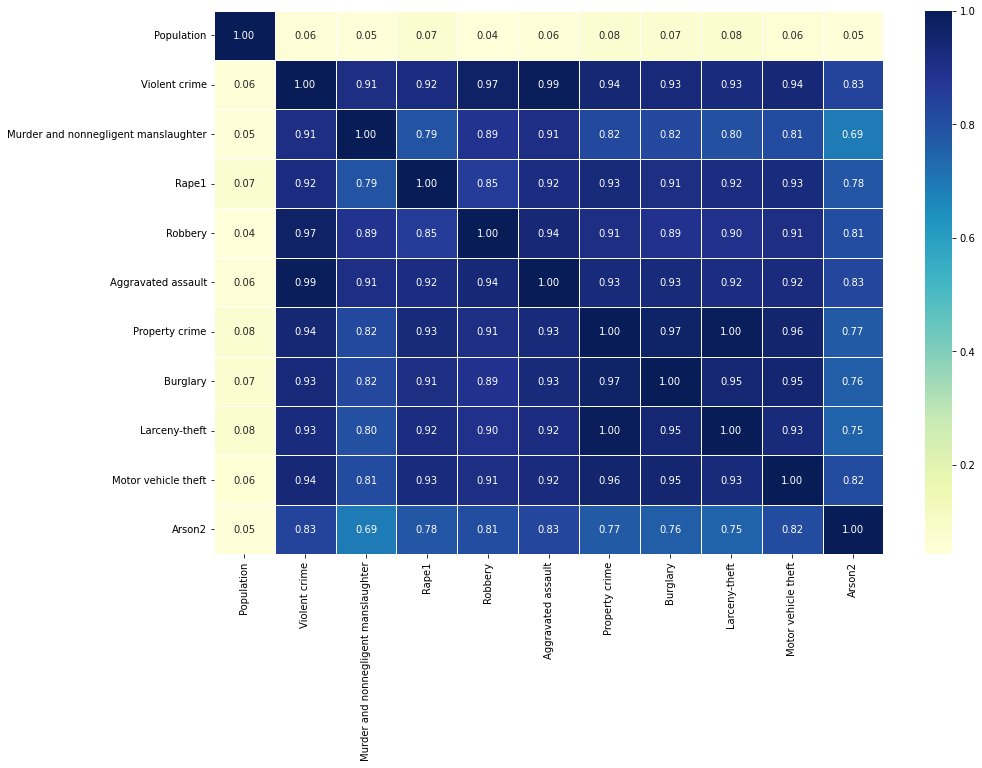

In [11]:
# making the matrix look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [12]:
violent_crimes = pd.DataFrame(np.random.rand(10, 9), columns=["Murder and nonnegligent manslaughter", "Rape1", "Robbery", "Aggravat assault","Property crime","Burglary","Larceny-theft","Motor vehicle theft","Arson2"])

Text(0, 0.5, 'Number of Crimes')

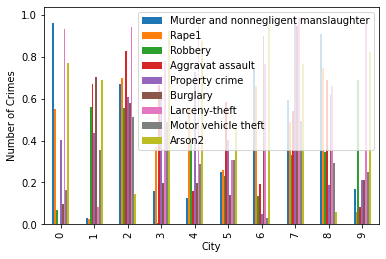

In [13]:
violent_crimes.plot.bar();
plt.xlabel('City')
plt.ylabel('Number of Crimes')

In [65]:
series = pd.Series(3 * np.random.rand(9), index=["Murder and nonnegligent manslaughter", "Rape1", "Robbery", "Aggravat assault","Property crime","Burglary","Larceny-theft","Motor vehicle theft","Arson2"], name="series")

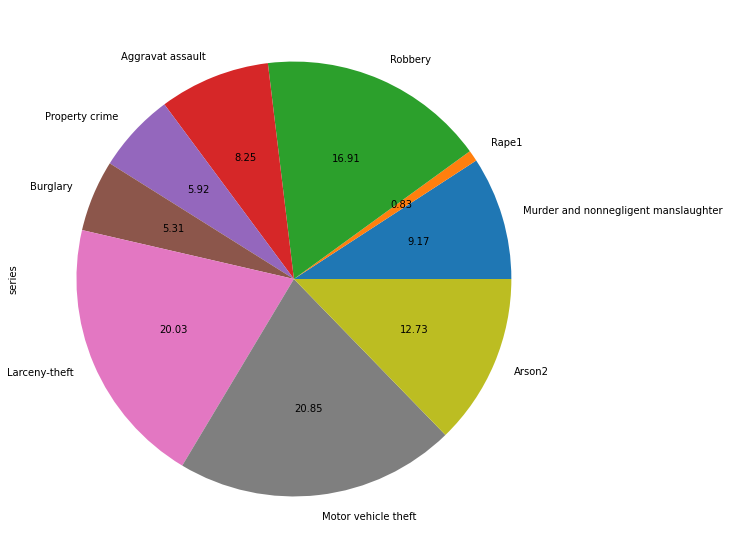

In [66]:
series.plot.pie(figsize=(10, 10),autopct="%.2f");